In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Starbucks Modelling

In [2]:
starbucks_only = pd.read_csv('data_exploration/us_data.csv').drop(columns='Unnamed: 0')

In [3]:
starbucks_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in starbucks_only['% Bachelors+ Change']]
starbucks_only['% Bachelors+ Change'] = starbucks_only['% Bachelors+ Change'].fillna(starbucks_only['% Bachelors+ Change'].mean())

In [4]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

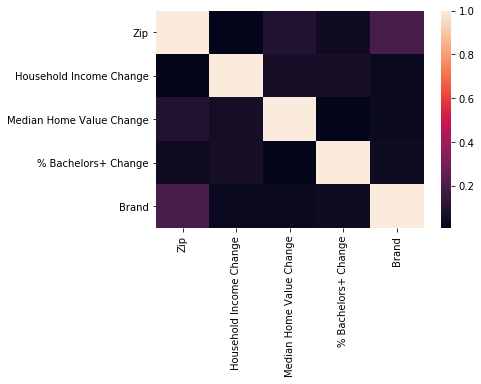

In [5]:
sns.heatmap(starbucks_only.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bb3b2dd8>,
      dtype=object)

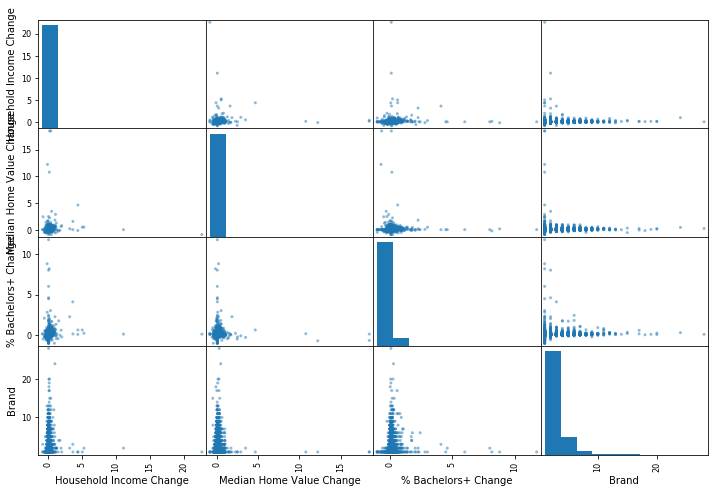

In [83]:
pd.plotting.scatter_matrix(starbucks_only.iloc[:, 1:], figsize=(12,8))

### Multiple Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.linear_model import LinearRegression
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [8]:
yhat = multi.predict(X_test)

In [9]:
sb_multi = multi.score(X_test, y_test)

In [10]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -1.18 %
Standard Deviation: 4.41 %


### Support Vector Regression

In [11]:
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [14]:
sb_svr = svr.score(X_test, y_test)

In [15]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-v

Accuracy: -2.86 %
Standard Deviation: 2.50 %


### Decision Tree Regression

In [16]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [18]:
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [20]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
yhat = tree.predict(X_test)

In [22]:
sb_tree = tree.score(X_test, y_test)

In [23]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -97.24 %
Standard Deviation: 21.63 %


### Random Forest Regressor

In [24]:
X = starbucks_only.iloc[:, 1:-1].values
y = starbucks_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [25]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10)

In [28]:
yhat = rf.predict(X_test)

In [29]:
sb_rf = rf.score(X_test, y_test)

In [30]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anacon

Accuracy: -14.65 %
Standard Deviation: 8.03 %


# Walmart Modelling

In [31]:
walmart_only = pd.read_csv('data_exploration/walmart_full_us_data.csv')
walmart_only = walmart_only.loc[walmart_only['Walmart Store Count'] != 0.0].drop(columns='Unnamed: 0')

In [32]:
walmart_only['% Bachelors+ Change'] = [np.nan if np.isinf(i) else i for i in walmart_only['% Bachelors+ Change']]
walmart_only['% Bachelors+ Change'] = walmart_only['% Bachelors+ Change'].fillna(walmart_only['% Bachelors+ Change'].mean())

In [33]:
walmart_only

,Zip,Household Income Change,Median Home Value Change,% Bachelors+ Change,Walmart Store Count
7,617,0.026309,0.010476,0.041979,1.0
30,12866,0.245664,0.250828,0.097164,1.0
37,12883,0.160910,-0.075327,-0.094871,1.0
42,12901,0.145176,0.076046,-0.009954,1.0
78,12953,0.153311,0.182036,-0.036336,1.0
...,...,...,...,...,...
32947,99611,-0.070062,0.292442,0.028524,1.0
32951,99615,0.207142,0.232244,0.116488,1.0
32981,99654,0.124321,0.148285,0.267973,1.0
33020,99701,0.129938,0.008086,-0.066228,1.0


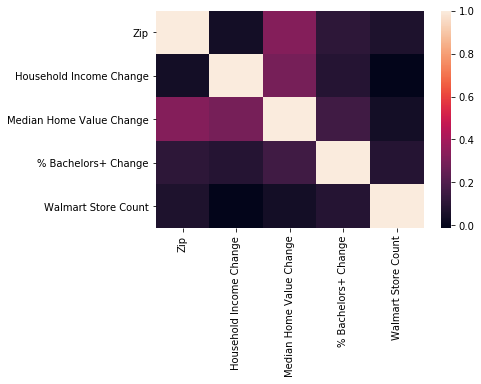

In [34]:
sns.heatmap(walmart_only.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bbbda898>,
      dtype=object)

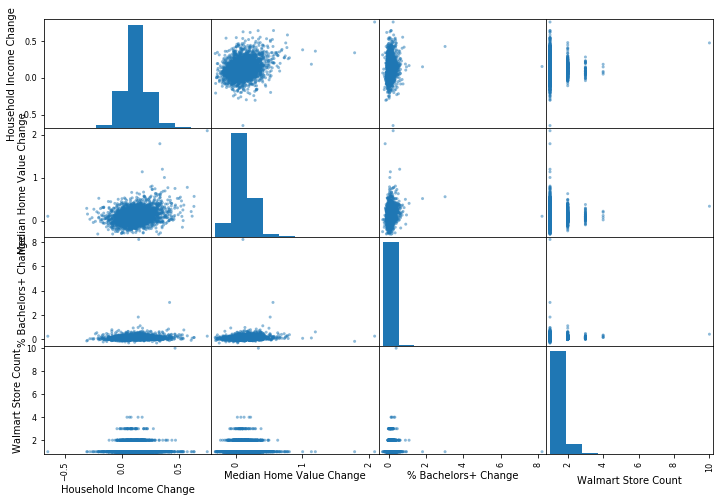

In [84]:
pd.plotting.scatter_matrix(walmart_only.iloc[:, 1:], figsize=(12,8))

### Multiple Linear Regressor

In [35]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression()

In [38]:
wm_multi = multi.score(X_test, y_test)

In [39]:
accuracies = cross_val_score(estimator = multi, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 0.64 %
Standard Deviation: 2.53 %


### Support Vector Regression

In [40]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

In [41]:
y = y.reshape(len(y), 1)

In [42]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [45]:
wm_svr = svr.score(X_test, y_test)

In [46]:
accuracies = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-v

Accuracy: -4.51 %
Standard Deviation: 1.79 %


### Decision Tree Regression

In [47]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [48]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
wm_tree = tree.score(X_test, y_test)

In [52]:
accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -95.90 %
Standard Deviation: 19.72 %


### Random Forest Regressor

In [53]:
X = walmart_only.iloc[:, 1:-1].values
y = walmart_only.iloc[:, -1].values

y = y.reshape(len(y), 1)

In [54]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(n_estimators=10)

In [57]:
wm_rf = rf.score(X_test, y_test)

In [58]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/troyramsey/opt/anacon

Accuracy: -20.32 %
Standard Deviation: 10.18 %


# Comparing models across datasets

In [59]:
sb_match = [sb_multi, sb_svr, sb_tree, sb_rf]
wm_match = [wm_multi, wm_svr, wm_tree, wm_rf]
models = ['Multiple Regression', 'SVR', 'Decision Tree Regression', 'Random Forest Regression']

In [60]:
compare = pd.DataFrame()
compare['Model Type'] = models
compare['Starbucks'] = sb_match
compare['Walmart'] = wm_match

In [70]:
compare_full = pd.read_csv('full_us_compare.csv')

In [74]:
model_comparison = compare.merge(compare_full, on='Model Type').drop(columns='Unnamed: 0')

In [75]:
model_comparison

,Model Type,Starbucks,Walmart,Starbucks - Full US,Walmart - Full US
0,Multiple Regression,-0.067069,-0.046700,0.001042,0.002589
1,SVR,-0.043480,-0.027916,-0.057317,-0.064115
2,Decision Tree Regression,-0.865768,-0.645945,-0.874926,-0.915713
3,Random Forest Regression,-0.132869,-0.502710,-0.033776,-0.040049


- ### Feature importance graphing w/ random forest and decision tree